In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time

/usr/lib/python3.9/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
import Prepare_time_series as pts

importing Jupyter notebook from Prepare time series.ipynb


In [9]:
szeregi=pts.przygotujSzeregiCzasowe(50,306)

KatalogPickli="Pickle"

In [9]:
os.makedirs(KatalogPickli,exist_ok=True)

In [16]:
def wyborLiczbyGrup(szeregi, listaLiczbyGrupDoSprawdzenia):
    listaModeli=[]
    czas=str(time.time())
    with ProcessPoolExecutor(4) as pool:
        for k in listaLiczbyGrupDoSprawdzenia:
            model=TimeSeriesKMeans(n_clusters=k,metric="softdtw")
            listaModeli.append(pool.submit(model.fit, szeregi))
    listaNauczonychModeli=[obietnica.result() for obietnica in listaModeli]
    with open(os.path.join(KatalogPickli,czas+"-modele"),"wb") as plik:
        pickle.dump(listaNauczonychModeli, plik)
    listaObietnicIndeksowSS=[]
    with ProcessPoolExecutor(4) as pool:
        for m in listaNauczonychModeli:
            L=m.predict(szeregi)
            listaObietnicIndeksowSS.append(pool.submit(silhouette_score, szeregi, L, metric="softdtw"))
    listaIndeksowSS=[obietnica.result() for obietnica in listaObietnicIndeksowSS]
    with open(os.path.join(KatalogPickli,czas+"-ss"),"wb") as plik:
        pickle.dump(listaIndeksowSS, plik)
    return listaNauczonychModeli, listaIndeksowSS

In [18]:
wynik=wyborLiczbyGrup(szeregi, range(3,12))

/usr/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1353 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/usr/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1353 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/usr/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1353 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/usr/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1353 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/usr/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1353 1-dimensional timese

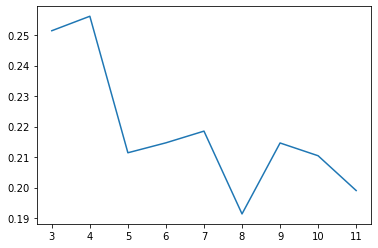

In [48]:
plt.plot(range(3,12),wynik[1])

In [45]:
for k in range(3,12):
    plt.gcf().set_size_inches((15,12))
    for i in range(k):
        plt.subplot(3,4,i+1)
        plt.tight_layout()
        plt.ylim(0.018,0.038)
        plt.plot(wynik[0][k-3].cluster_centers_[i].ravel())
    plt.savefig(os.path.join(pts.sciezkaDoObrazow,f"centra-grup-k-{k}"))
    plt.close()

In [53]:
%%time
odl=sklearn.metrics.pairwise_distances(np.array(szeregi), metric=tslearn.metrics.soft_dtw,n_jobs=-1)

CPU times: user 2h 28min 19s, sys: 5min 18s, total: 2h 33min 37s
Wall time: 2h 14min 30s


In [55]:
with open(os.path.join(KatalogPickli, "borrelia-odleglosciMiedzySzeregami-softdtw"),"wb") as plik:
    pickle.dump(odl, plik)

In [7]:
with open(os.path.join(KatalogPickli, "1620282175.0956235-modele"), "rb") as plik:
    modele=pickle.load(plik)
with open(os.path.join(KatalogPickli, "borrelia-odleglosciMiedzySzeregami-softdtw"), "rb") as plik:
    odl=pickle.load(plik)

In [17]:
odl

array([[-358.14235566, -358.13305464, -358.11958768, ..., -358.11708997,
        -358.13177666, -358.07620874],
       [-358.13305464, -358.1430137 , -358.11089564, ..., -358.11931839,
        -358.13473692, -358.06333144],
       [-358.11958768, -358.11089564, -358.14218459, ..., -358.12994944,
        -358.12560735, -358.1087201 ],
       ...,
       [-358.11708997, -358.11931839, -358.12994944, ..., -358.14111383,
        -358.13038261, -358.10068277],
       [-358.13177666, -358.13473692, -358.12560735, ..., -358.13038261,
        -358.14178862, -358.09310644],
       [-358.07620874, -358.06333144, -358.1087201 , ..., -358.10068277,
        -358.09310644, -358.13952798]])